<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/Predictions-for-Customer-Churn/blob/main/Tulco_Customer_Churn_fromKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing the dataset

After importing the dataset , we drop the columns which contain useless values and will worsen our model.In this case , those columns are customerID,gender and payment method

In [30]:
dataset=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset=dataset.drop(columns=['customerID','gender','PaymentMethod'])
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset.dropna()
dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


# Defining the inependent and dependent vectors

In [31]:
X=dataset.drop('Churn',axis=1)
y=dataset['Churn'].map({'Yes': 1, 'No': 0}).values

In [32]:
print(X)


      SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0                 0     Yes         No       1           No  No phone service   
1                 0      No         No      34          Yes                No   
2                 0      No         No       2          Yes                No   
3                 0      No         No      45           No  No phone service   
4                 0      No         No       2          Yes                No   
...             ...     ...        ...     ...          ...               ...   
7038              0     Yes        Yes      24          Yes               Yes   
7039              0     Yes        Yes      72          Yes               Yes   
7040              0     Yes        Yes      11           No  No phone service   
7041              1     Yes         No       4          Yes               Yes   
7042              0      No         No      66          Yes                No   

     InternetService Online

In [33]:
print(y)

[0 0 1 ... 0 1 0]


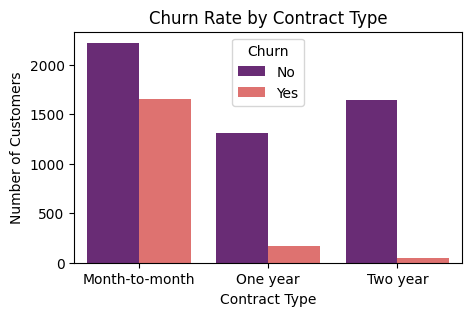

In [34]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset, x='Contract', hue='Churn', palette='magma')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

In [35]:
columns_=dataset.columns

In [36]:
print(columns_)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [37]:
columns_.drop('Churn')

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# Handling missing values

In [38]:
for col in columns_:
  missing_values=dataset[col].isnull().sum()
  if missing_values>0:
    print(col+" at index: ",dataset.columns.get_loc(col))


TotalCharges at index:  16


In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X.iloc[:,-1:])
X.iloc[:,-1:]=imputer.transform(X.iloc[:,-1:])

# Transforming the categorical features into numerical

In [40]:
categorical_features=[
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling'
]

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder=OneHotEncoder()
CT=ColumnTransformer(transformers=[('encoder',encoder,categorical_features)],
                     remainder='passthrough')
X=np.array(CT.fit_transform(X))


In [42]:
print(X)

[[0.0000e+00 1.0000e+00 1.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 3.4000e+01 5.6950e+01 1.8895e+03]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 2.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.1000e+01 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 4.0000e+00 7.4400e+01 3.0660e+02]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 6.6000e+01 1.0565e+02 6.8445e+03]]


# Train the model

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
print(dataset.head())

   SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0              0     Yes         No       1           No  No phone service   
1              0      No         No      34          Yes                No   
2              0      No         No       2          Yes                No   
3              0      No         No      45           No  No phone service   
4              0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

In [45]:
print(X_train)

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.10000e+01 6.48500e+01
  1.33680e+03]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 5.40000e+01 9.72000e+01
  5.12945e+03]
 [0.00000e+00 1.00000e+00 1.00000e+00 ... 1.00000e+00 2.34500e+01
  2.34500e+01]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.20000e+01 2.11500e+01
  3.06050e+02]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 1.20000e+01 9.94500e+01
  1.20015e+03]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 2.60000e+01 1.98000e+01
  4.57300e+02]]


In [46]:
num_of_columns=X.shape[1]
index_Sc=num_of_columns-3
print(index_Sc)

36


In [47]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
num_of_columns=X.shape[1]
index_Sc=num_of_columns-3
X_train[:,index_Sc:]=sc_X.fit_transform(X_train[:,index_Sc:])
X_test[:,index_Sc:]=sc_X.transform(X_test[:,index_Sc:])


In [48]:
print(X_train)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.65683364e-01
  -4.73723375e-04 -4.22098852e-01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  8.85536787e-01
   1.07475386e+00  1.25536630e+00]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ... -1.28460467e+00
  -1.37649913e+00 -1.00298527e+00]
 ...
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -8.34197950e-01
  -1.45294499e+00 -8.77993070e-01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ... -8.34197950e-01
   1.14953785e+00 -4.82538284e-01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ... -2.60953038e-01
  -1.49781538e+00 -8.11096150e-01]]


In [49]:
print(X_test)

[[ 0.          1.          1.         ... -1.28460467 -1.33162874
  -1.00238817]
 [ 1.          0.          1.         ...  0.35323794 -1.31667194
  -0.57263351]
 [ 0.          1.          0.         ...  0.80364466 -1.51277218
  -0.55704266]
 ...
 [ 0.          1.          0.         ... -0.62946762 -1.49449165
  -0.86751071]
 [ 0.          1.          0.         ...  1.49972776 -0.69513389
   0.29587649]
 [ 1.          0.          0.         ... -1.28460467 -1.11392424
  -0.99949115]]


# Creating the model

In [50]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

# Final result and prediction

In [51]:
y_pred=regressor.predict(X_test)

In [52]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.815471965933286
CM: [[935 101]
 [159 214]]
